## Parameter Visualization
- Plot each vowel and the parameterization (`LPC`/`MFCC`)
- See whether or not there exists a pattern for frontness and height to understand phonetic grounding of data

In [85]:
import matplotlib.pyplot as plt 
import scipy.io
import numpy as np

### Step 1) Import Data
- Deserialize the Matlab `.mat` files and import them as numpy arrays

In [86]:
# Parameterizations are stored as Matlab `.mat` files

# Uncomment for which parameterization to use
PARAMETERIZATION_TYPE = "LPC"
DATA_SET = "Training"
PARAMETERIZATION_MATRIX_PATH = ""

if PARAMETERIZATION_TYPE == "LPC":
    if(DATA_SET=="TEST"):
        PARAMETERIZATION_MATRIX_PATH = "../Matlab/data/Hillenbrand/man/LPC_10_vowels_90_samples.mat"
    else:
        PARAMETERIZATION_MATRIX_PATH = "../Matlab/data/InClass/LPC_10_vowels_236_samples.mat"
elif PARAMETERIZATION_TYPE == "MFCC":
    if(DATA_SET == "TEST"):
         PARAMETERIZATION_MATRIX_PATH = "../Matlab/data/Hillenbrand/man/MFCC_10_vowels_90_samples.mat"
    else:
        PARAMETERIZATION_MATRIX_PATH = "../Matlab/data/InClass/MFCC_10_vowels_236_samples.mat"
else:
    raise (ValueError(
        f"PARAMETERIZATION_TYPE is {PARAMETERIZATION_TYPE}, but must be 'LPC' or 'MFCC."))

# Hardcode the path and ignore if statements
# PARAMETERIZATION_MATRIX_PATH = "../Matlab/data/Hillenbrand/woman/LPC_10_vowels_100_samples.mat"

# Specified as the name of the matrix in the matlab processing `save` function
COEFFICIENTS_KEY = "wav_parameterization"
LABEL_KEY = "one_hot_encoding_labels"

NUM_COEFFICIENTS = 14
VOWEL_LIST = ["iy", "ih", "eh", "ae", "ey", "uw", "uh", "ow", "ao", "aa"]

In [87]:
# Import the coefficients as an n by NUM_COEFFICINETS matrix where n = number of samples
deserialized_matlab_file = scipy.io.loadmat(PARAMETERIZATION_MATRIX_PATH)

coefficient_matrix = deserialized_matlab_file[COEFFICIENTS_KEY]
print(coefficient_matrix.shape)
coefficient_matrix = np.array(coefficient_matrix).reshape(-1, NUM_COEFFICIENTS)

labels_matrix = deserialized_matlab_file[LABEL_KEY]
labels_matrix = np.array(labels_matrix).reshape(-1, len(VOWEL_LIST))

(236, 14)


In [88]:
# (Num Samples, NUM_COEFFICIENTS)
coefficient_matrix.shape

(236, 14)

In [89]:
# (Num Samples, Number of Vowels)
labels_matrix.shape

(236, 10)

### Step 3) Process Data
- Map each vowel to its corresponding coefficients

In [90]:
from collections import defaultdict
# Map vowel as a string to parameterization coefficient
vowel_coefficient_mapping: dict[str, list[np.array]] = defaultdict(list)

In [91]:
# Map each vowel as <Vowel_Name: str, list[np.array of Coefficients]>
for label, vowel_coefficients in zip(labels_matrix, coefficient_matrix):
    vowel_idx = np.argmax(label)
    vowel_name = VOWEL_LIST[vowel_idx]
    vowel_coefficient_mapping[vowel_name].append(vowel_coefficients)

# Remap the values as <Vowel_Name: str, np.ndarray(Number of Samples for Vowel, Coefficient Length)>
vowel_coefficient_mapping = {
    label: np.vstack(vowel_coefficients)
    for label, vowel_coefficients in vowel_coefficient_mapping.items()
}

### Step 3) Plot Data
- Plot each vowel's coefficients from [0: Number of One Hot Encodings]`

[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]
[31, 22, 30, 22, 22, 21, 22, 22, 22, 22]


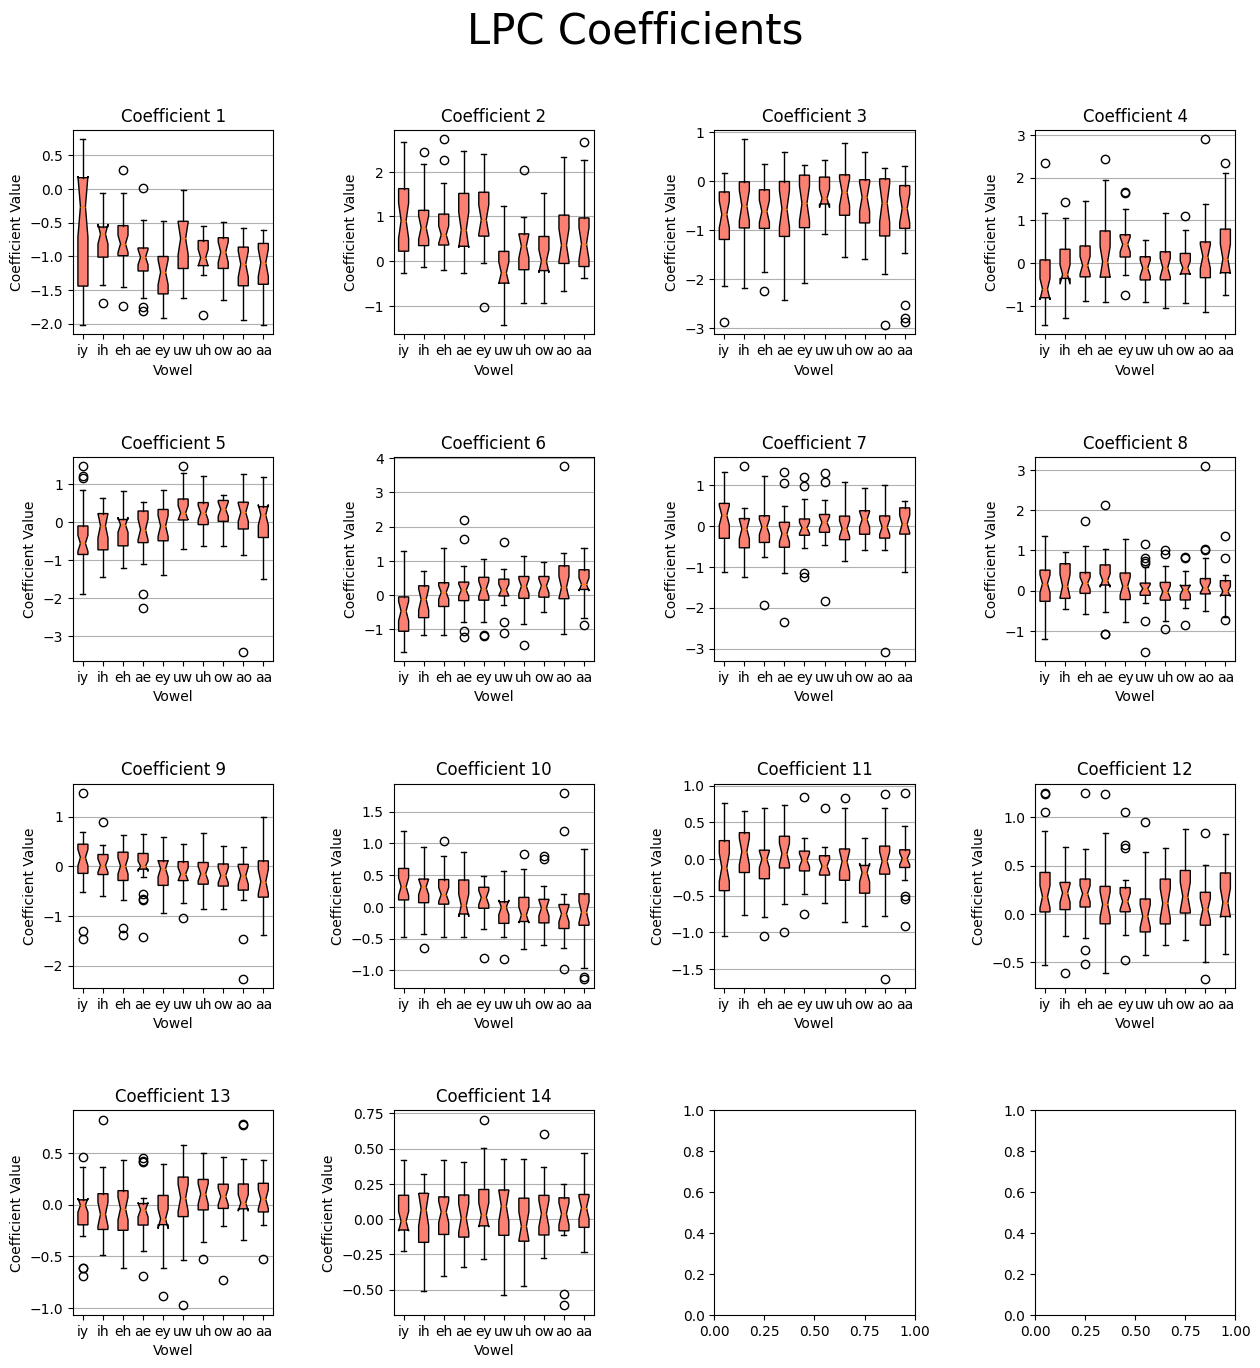

In [92]:
# Window Size
plt.rcParams['figure.figsize'] = (15, 15)

# Create a square of plots representing the coefficinets
side_len = int(np.ceil(np.sqrt(NUM_COEFFICIENTS)))

fig, axes = plt.subplots(nrows=side_len, ncols=side_len)
plt.subplots_adjust(hspace=0.6, wspace=0.6, top=0.9)

fig.suptitle(f"{PARAMETERIZATION_TYPE} Coefficients", fontsize=30)

for i in range(NUM_COEFFICIENTS):
    cur_plot = axes[i // side_len][i % side_len]
    cur_plot.set_title(f"Coefficient {i+1}")
    cur_plot.set_ylabel(f"Coefficient Value")
    cur_plot.set_xlabel(f"Vowel")
    cur_plot.yaxis.grid(True)
   

    print([len(vowel_coefficients[:, i]) for vowel_coefficients in list(vowel_coefficient_mapping.values())])
    cur_plot.boxplot(
        [vowel_coefficients[:, i] for vowel_coefficients in vowel_coefficient_mapping.values()],
        labels=vowel_coefficient_mapping.keys(),
        boxprops=dict(facecolor="skyblue" if PARAMETERIZATION_TYPE=="MFCC" else "salmon"),
        notch=True,
        vert=True,
        patch_artist=True,
    )